<a href="https://colab.research.google.com/github/ummaysumaiya0808/LSTM-analysis/blob/main/LSTM_Stock_market_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Stock_data.csv')
print(df)

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

#*Loading the stock market data*

In [3]:
df =df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

<ipython-input-3-a5f29e4fc1d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


#To normalize the data

In [5]:
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

#For LSTM model preparation

In [6]:
seq_len = 60
X, y = [], []

for i in range(seq_len, len(df)):
    X.append(df['Close'][i - seq_len:i].values)
    y.append(df['Close'][i])

In [7]:
X, y = np.array(X), np.array(y)

#Transform input data (samples, timesteps, features) into a 3D format

In [8]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Construct the LSTM model

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# To compile the model

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model for training purpose

In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
50/50 [==============================] - 8s 62ms/step - loss: 0.0126
Epoch 2/10
50/50 [==============================] - 4s 75ms/step - loss: 9.0113e-04
Epoch 3/10
50/50 [==============================] - 3s 57ms/step - loss: 8.0630e-04
Epoch 4/10
50/50 [==============================] - 3s 57ms/step - loss: 7.8603e-04
Epoch 5/10
50/50 [==============================] - 3s 56ms/step - loss: 8.2575e-04
Epoch 6/10
50/50 [==============================] - 4s 82ms/step - loss: 8.0217e-04
Epoch 7/10
50/50 [==============================] - 3s 57ms/step - loss: 6.9983e-04
Epoch 8/10
50/50 [==============================] - 3s 57ms/step - loss: 6.5592e-04
Epoch 9/10
50/50 [==============================] - 3s 56ms/step - loss: 6.9374e-04
Epoch 10/10
50/50 [==============================] - 4s 82ms/step - loss: 6.1325e-04


#Review the model

In [13]:
train_loss = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}')

50/50 [==============================] - 2s 17ms/step - loss: 9.7008e-04
Training Loss: 0.0010


#Evaluate the model

In [14]:
test_loss = model.evaluate(X_test, y_test)
print(f'Testing Loss: {test_loss:.4f}')

13/13 [==============================] - 0s 16ms/step - loss: 0.0010
Testing Loss: 0.0010


#Prediction

In [15]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

13/13 [==============================] - 0s 33ms/step


#Reverse predictions to obtain the current stock values

In [16]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

#Visualization

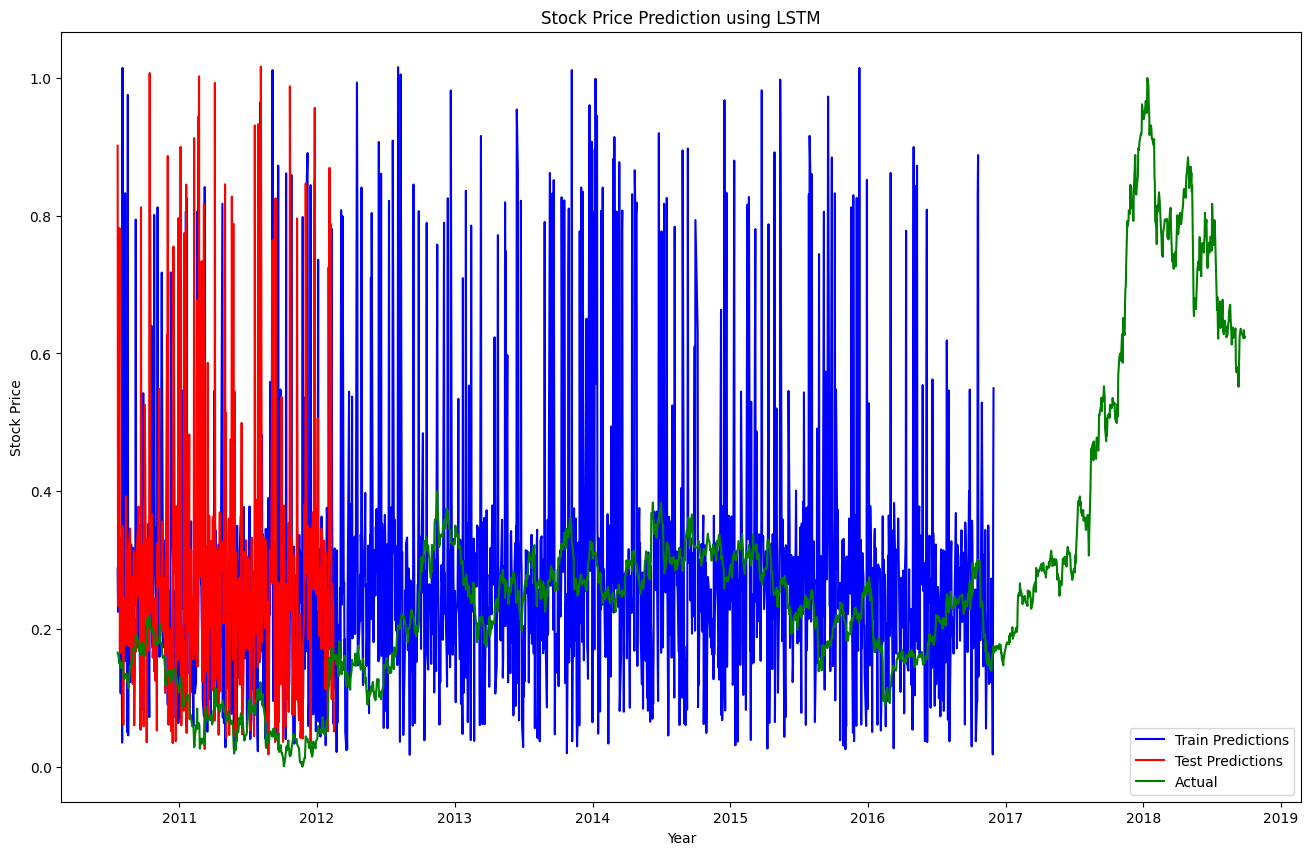

In [19]:
plt.figure(figsize=(16, 10))
plt.plot(df.index[-len(train_predictions):], train_predictions, label='Train Predictions', color='blue')
plt.plot(df.index[-len(test_predictions):], test_predictions, label='Test Predictions', color='red')
plt.plot(df.index, df['Close'], label='Actual', color='green')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.show()